In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data=pd.read_csv('~/Downloads/laptop_data.csv')

In [3]:
# 5 Row of the data set
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
# Checking the data shape 
print('No of columns:',data.shape[0])
print('No of Rows :',data.shape[1])

No of columns: 1303
No of Rows : 12


In [5]:
# Checking the data types of columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
data.duplicated().sum()

0

In [7]:
# Checking the missing values in the data set
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
# Removing unwanted Columns
data.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
data['Ram']=data['Ram'].str.replace('GB','')

In [10]:
data['Weight']=data['Weight'].str.replace('kg','')

In [11]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
data['Ram']=data['Ram'].astype('int32')
data['Weight']=data['Weight'].astype(float)

# Expolatory Data Analysis

In [13]:
num_cols=data.select_dtypes(include=np.number).columns
num_cols

Index(['Inches', 'Ram', 'Weight', 'Price'], dtype='object')

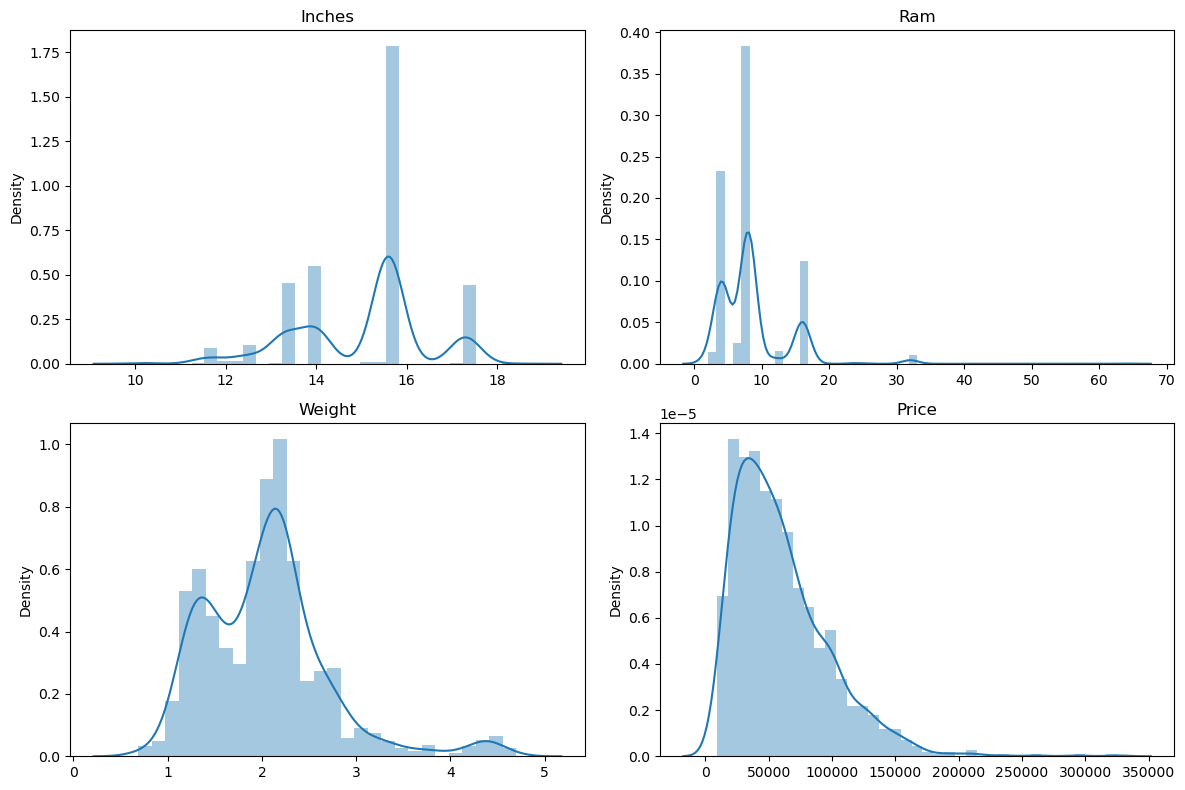

In [14]:
plt.rcParams['figure.figsize']=(12,8)
t=1
for i in num_cols:
    plt.subplot(2,2,t)
    sns.distplot(x=data[i])
    plt.title(i)
    t=t+1
plt.tight_layout()    

In [15]:
cat_cols=data.select_dtypes(include=object).columns
cat_cols

Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu',
       'OpSys'],
      dtype='object')

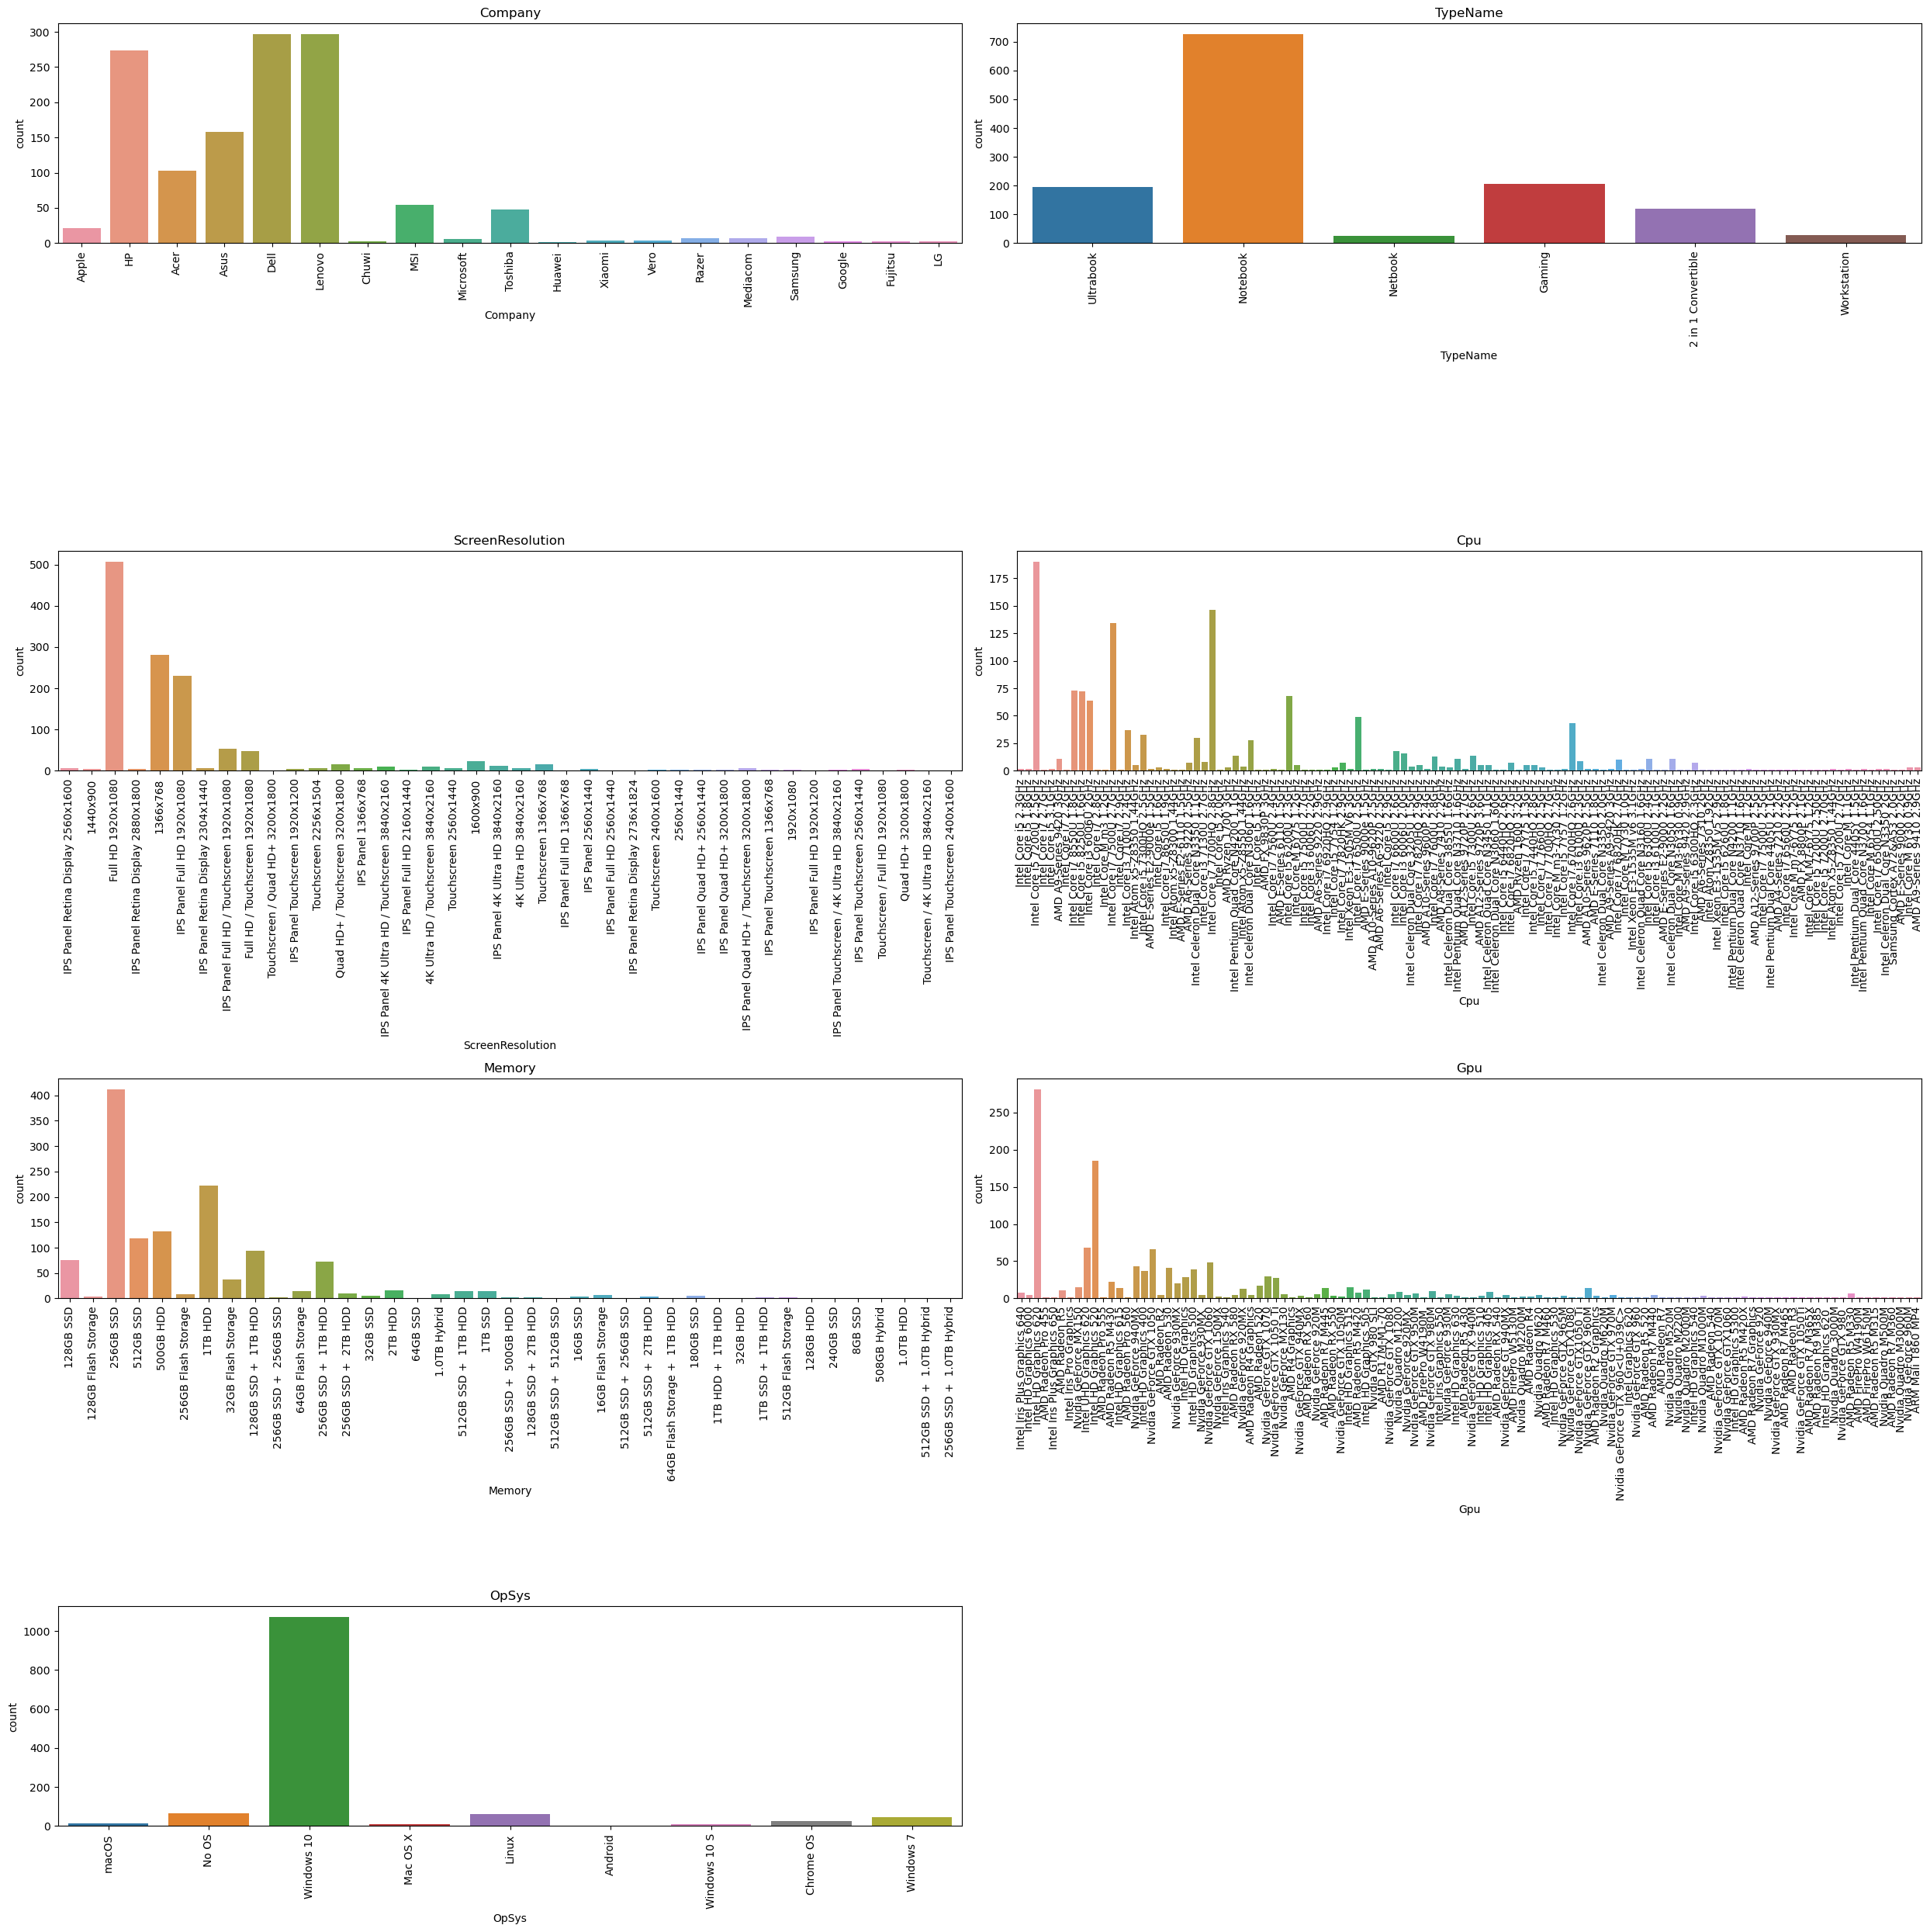

In [16]:
plt.rcParams['figure.figsize']=[25,25]
t=1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(x=data[i])
    t=t+1
    plt.title(i)
    plt.xticks(rotation='vertical')
plt.tight_layout()    

# Bivariate Analysis

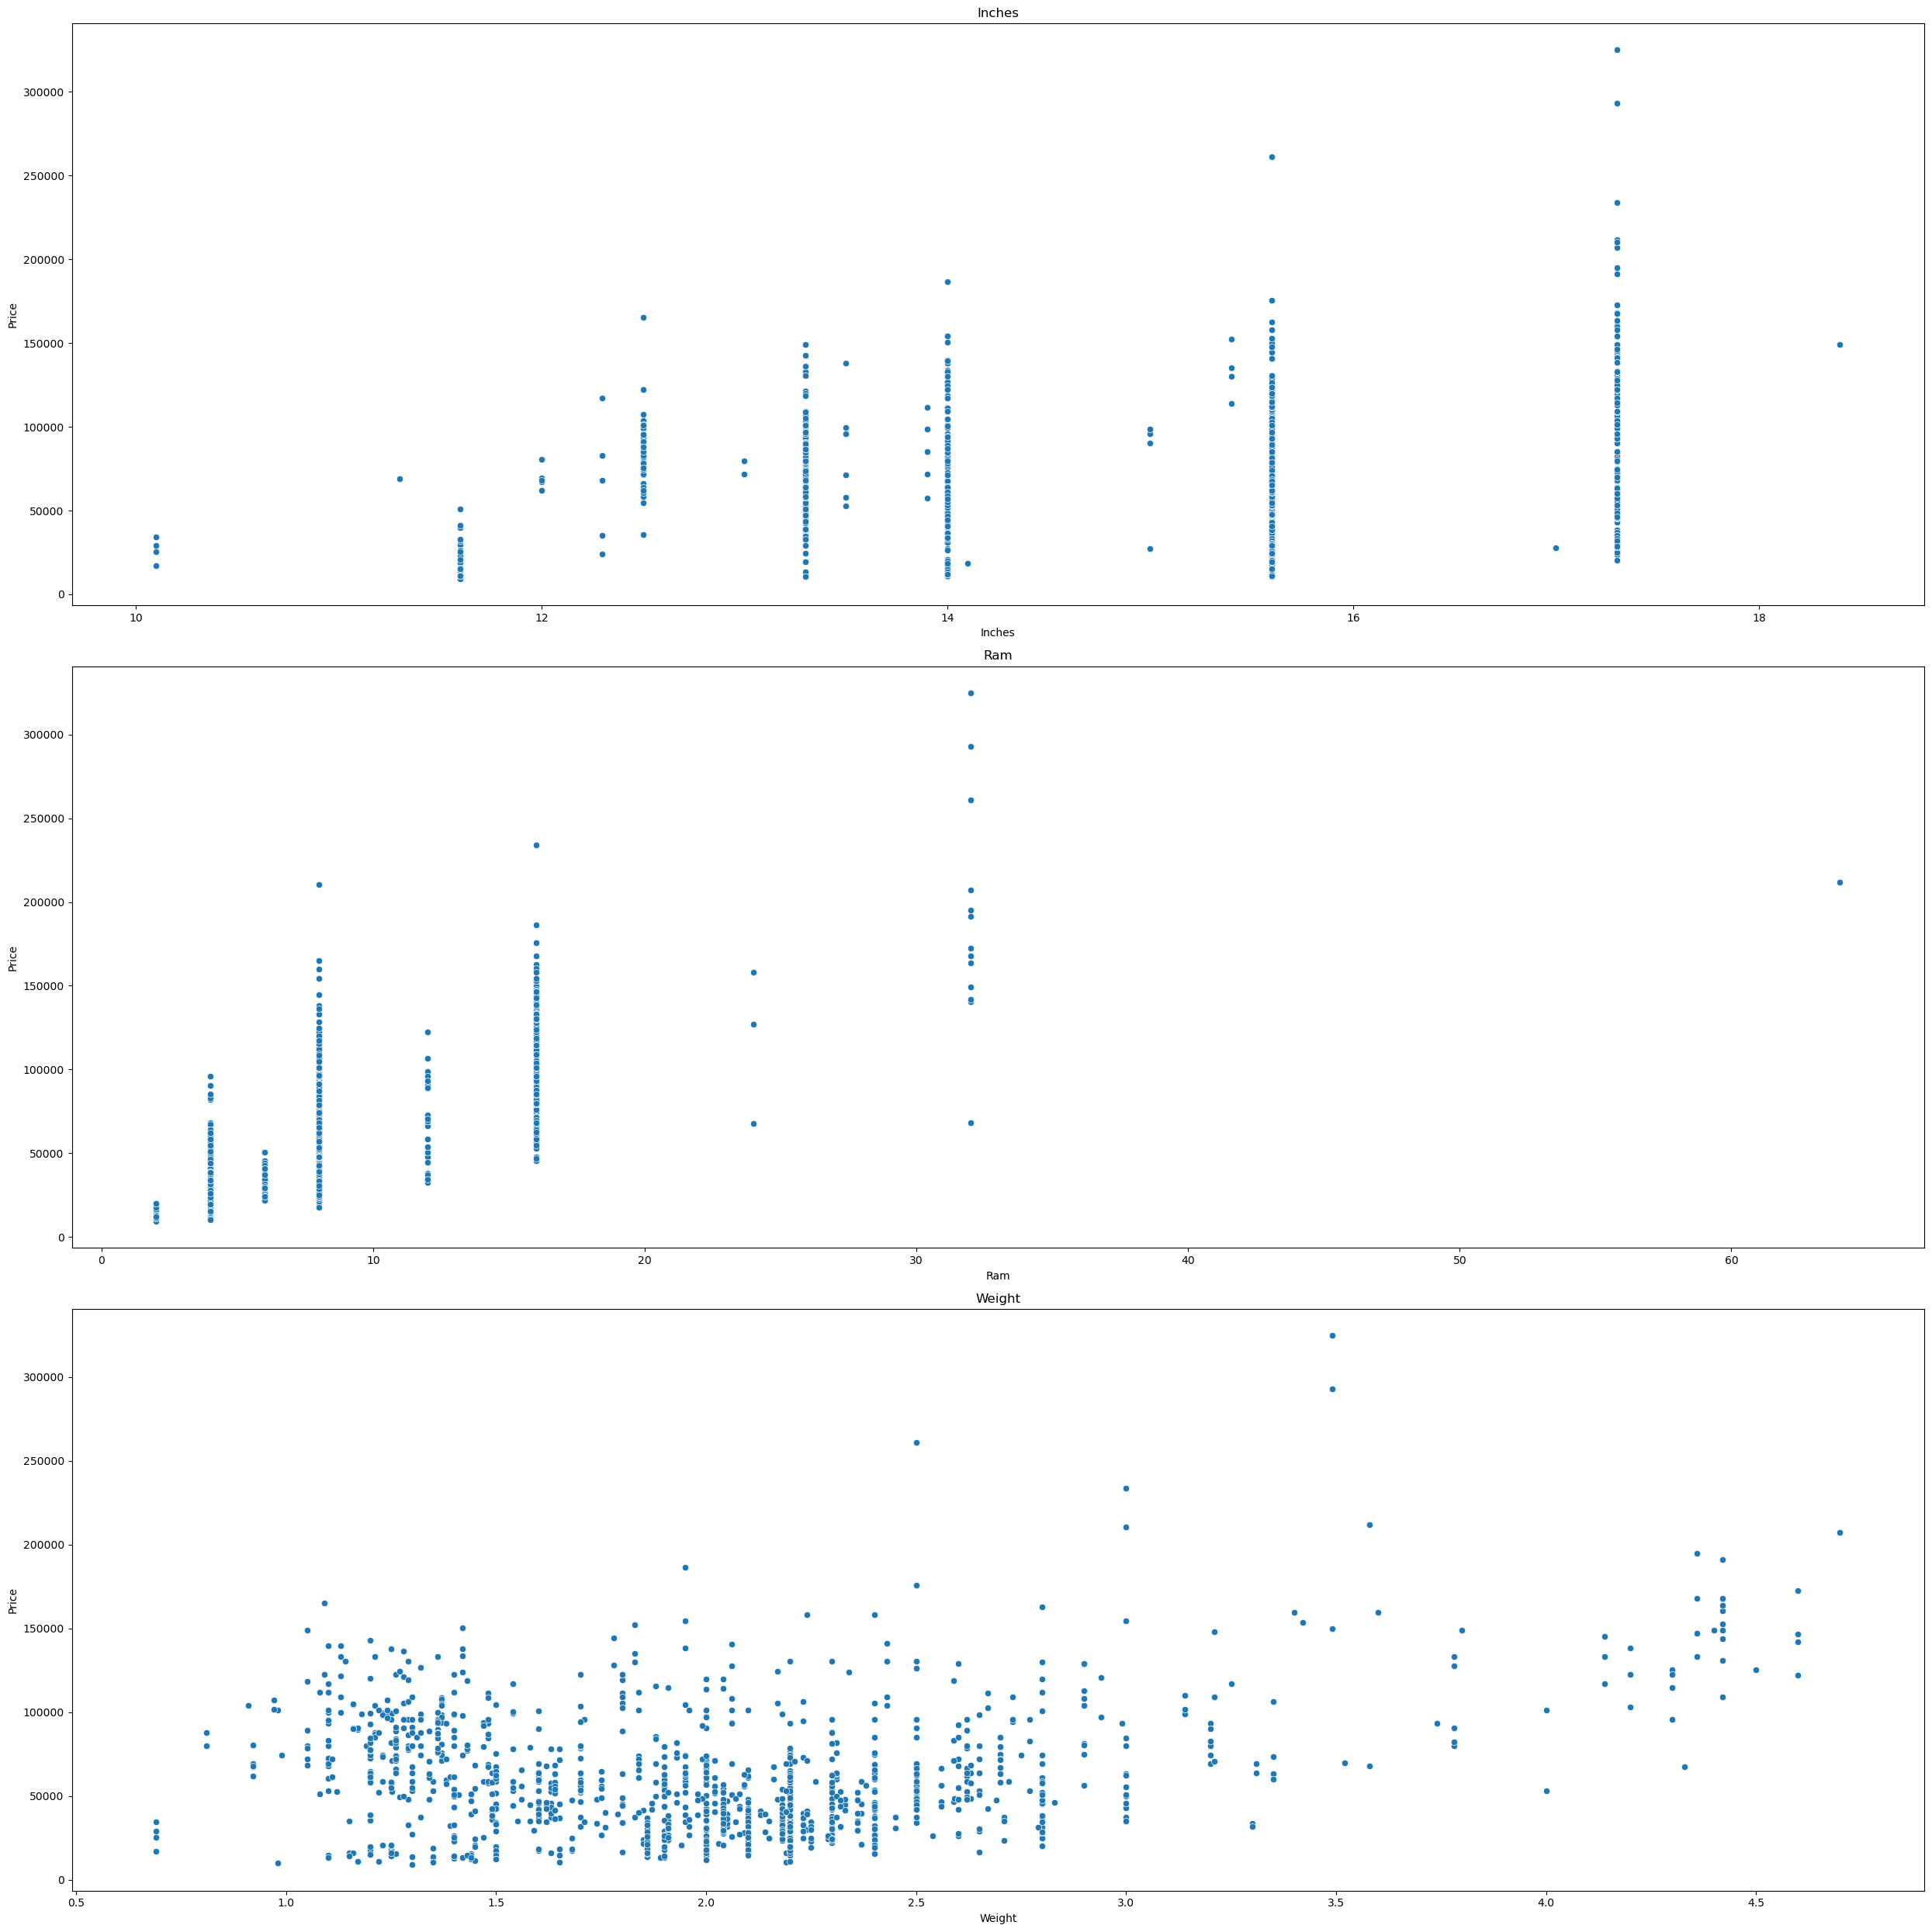

In [17]:
t=1
for i in ['Inches', 'Ram', 'Weight']:
    plt.subplot(3,1,t)
    sns.scatterplot(x=data[i],y=data['Price'])
    t=t+1
    plt.title(i)
plt.tight_layout()    

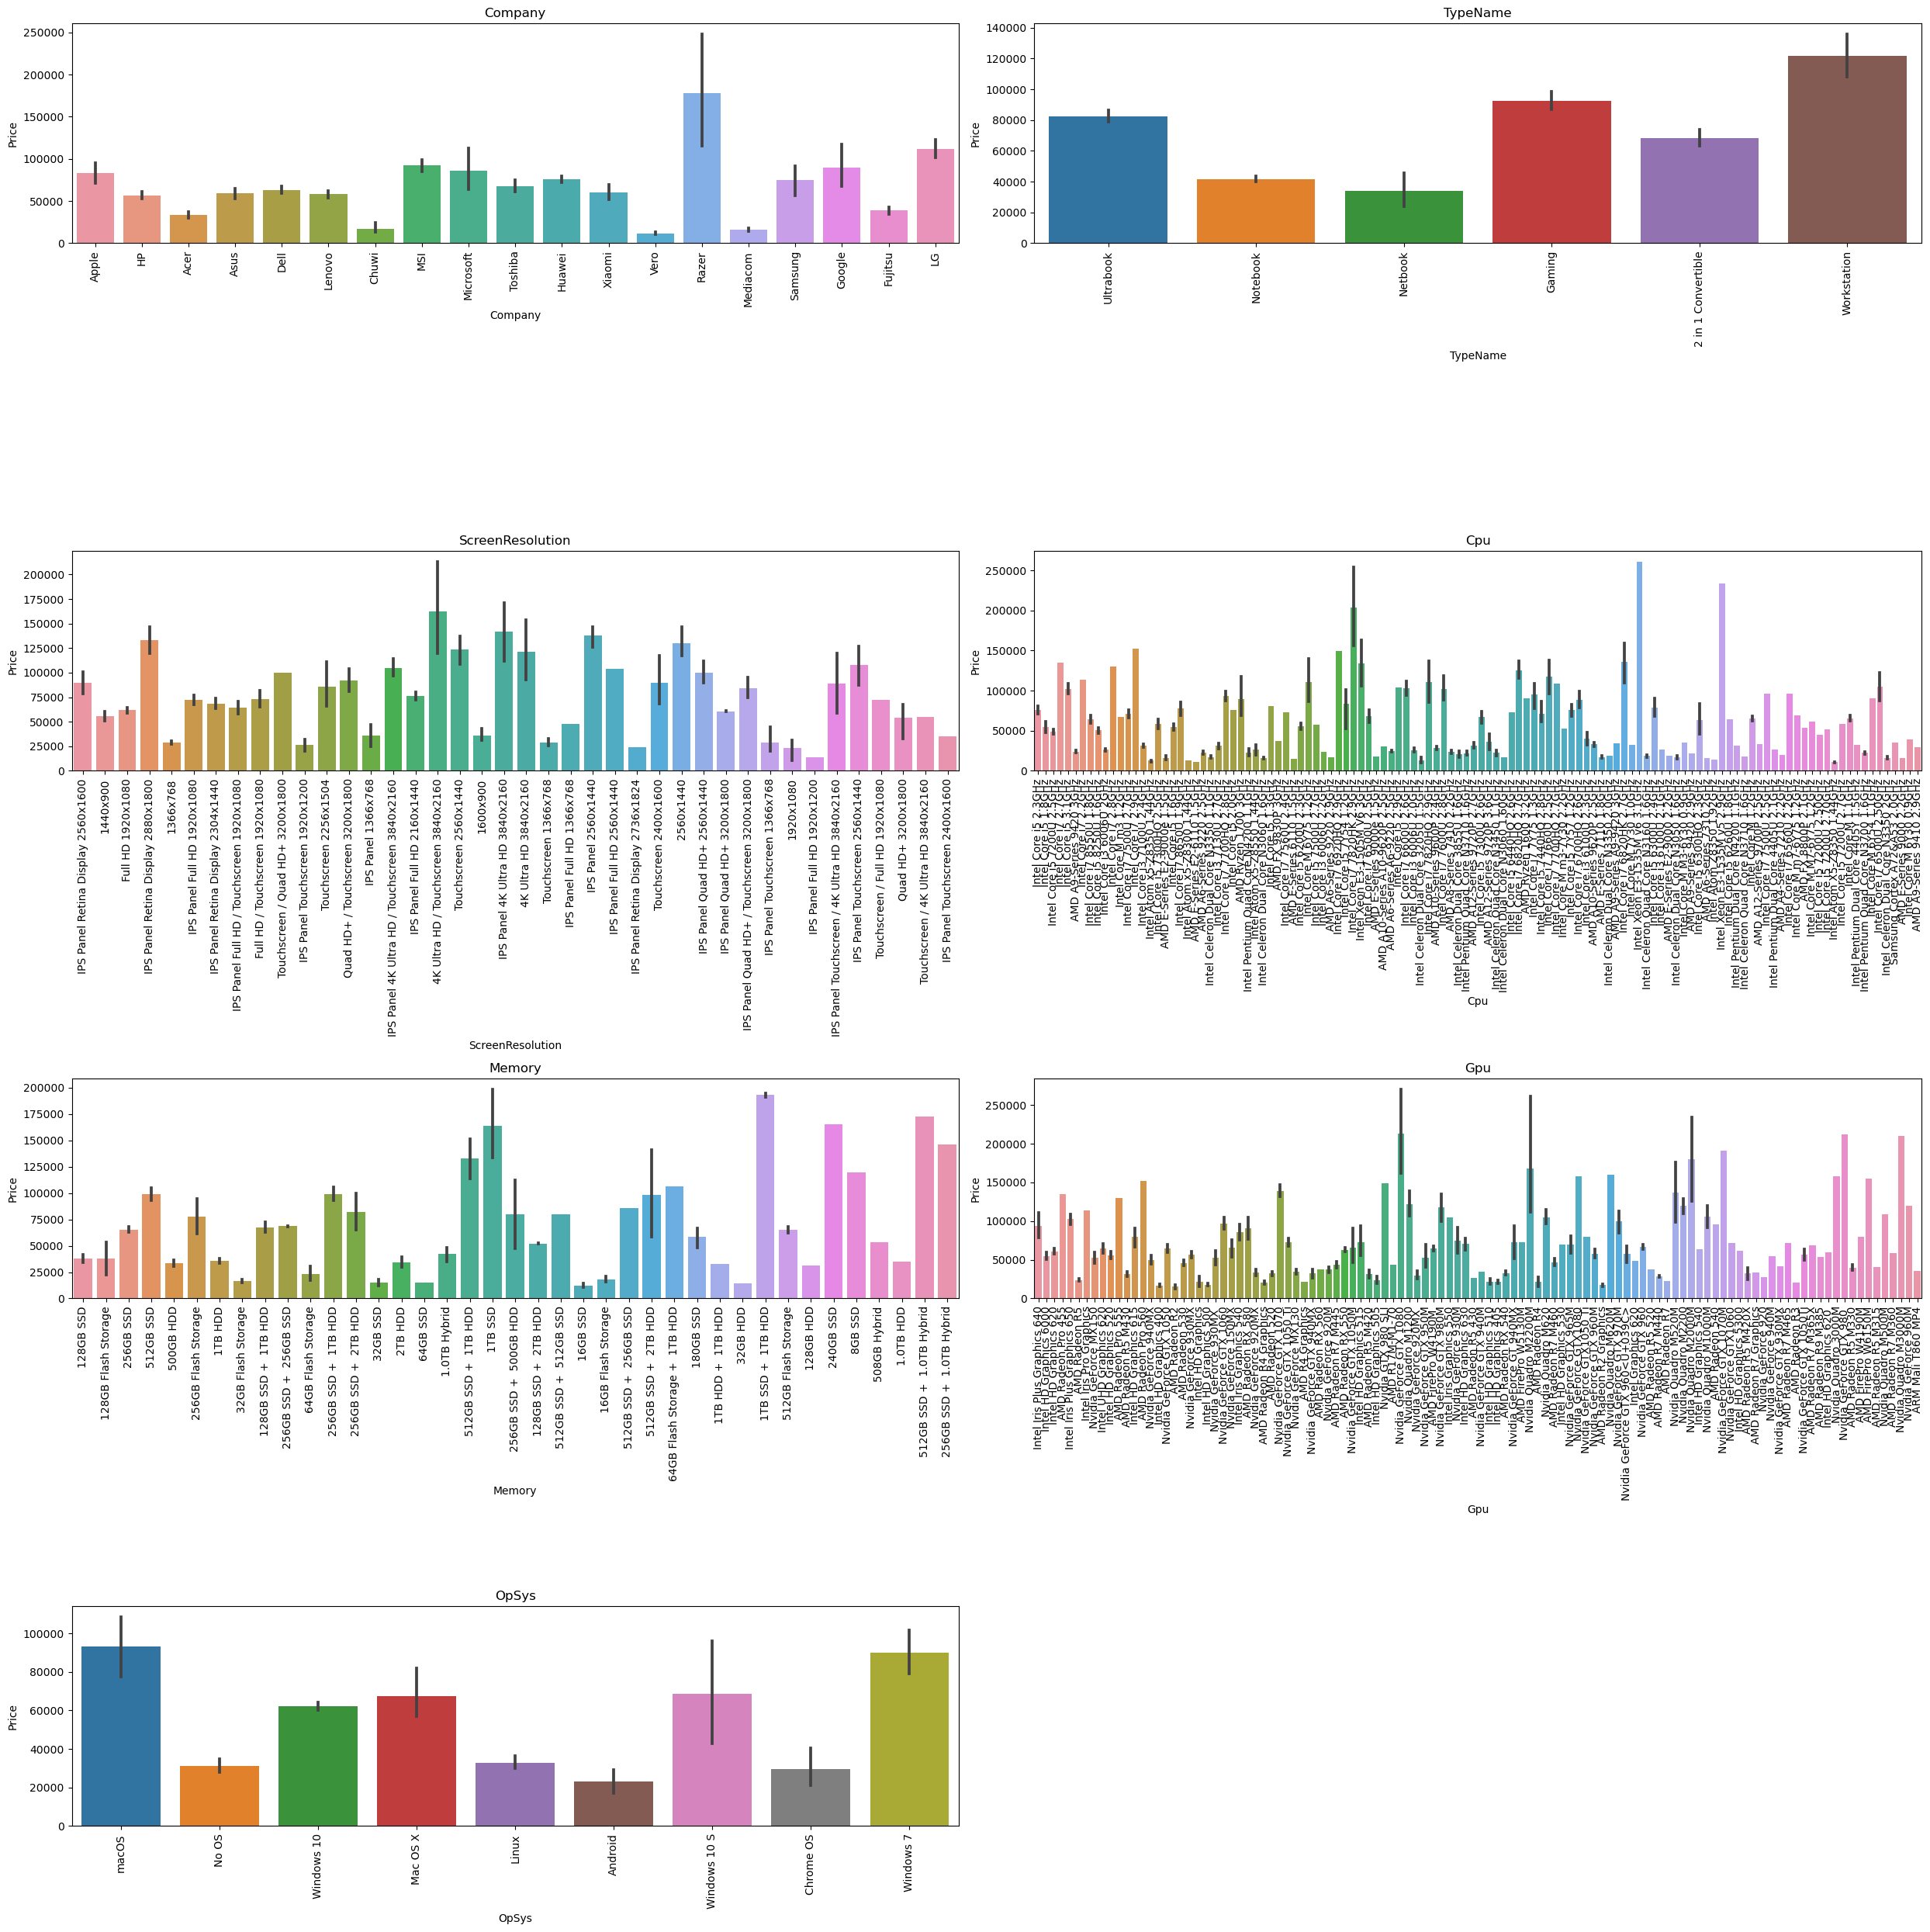

In [18]:
t=1 
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.barplot(x=data[i],y=data['Price'])
    t=t+1
    plt.title(i)
    plt.xticks(rotation='vertical')
plt.tight_layout()

In [19]:
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if  'Touchscreen' in x else 0 )

In [20]:
data['Touchscreen'].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

In [21]:
data['Ips']=data['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [22]:
data['Ips'].value_counts()

Ips
0    938
1    365
Name: count, dtype: int64

<Axes: xlabel='Ips', ylabel='Price'>

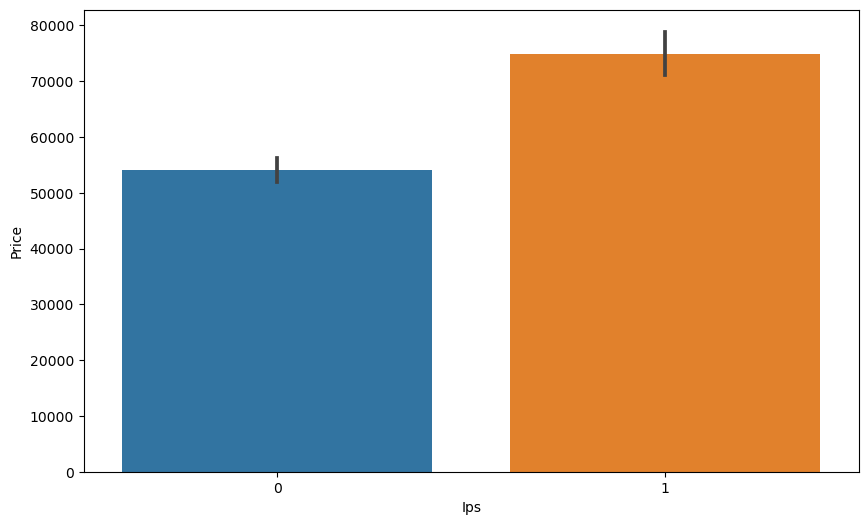

In [23]:
plt.rcParams['figure.figsize']=(10,6)
sns.barplot(x=data['Ips'],y=data['Price'])

In [24]:
exp=data['ScreenResolution'].str.split('x',n=1,expand=True)

In [25]:
data['X_res']=exp[0]
data['Y_res']=exp[1]

In [26]:
data['X_res']=data['X_res'].str.replace(', ','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [27]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [28]:
data['X_res']=data['X_res'].astype(int)
data['Y_res']=data['Y_res'].astype(int)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [30]:
data['ppi']=(((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype(float)

In [31]:
data.drop(columns=['ScreenResolution'],axis=1,inplace=True)

In [32]:
data.drop(columns=['X_res','Y_res','Inches'],axis=1,inplace=True)

In [33]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [34]:
data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [35]:
 data['Cpu name']=data['Cpu'].apply(lambda x:" ".join( x.split()[0:3]))

In [36]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [37]:
def fetch_processor(x):
    if x=='Intel Core i7' or x=='Intel Core i5' or x=='Intel Core i3':  
        return(x)
    else: 
        if x.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [38]:
data['Cpu Brand']=data['Cpu name'].apply(fetch_processor)

In [39]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu name,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu Brand'>

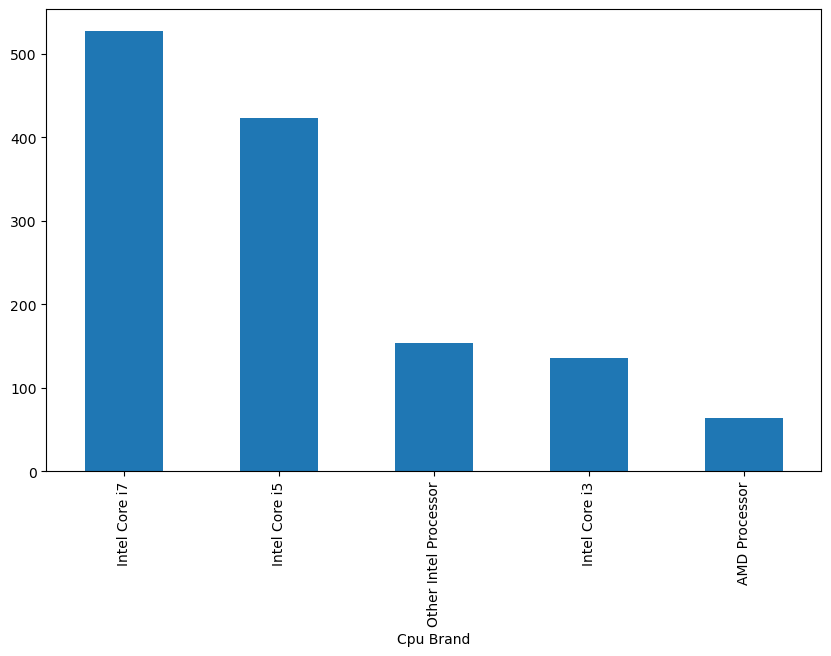

In [40]:
data['Cpu Brand'].value_counts().plot(kind='bar')

<Axes: xlabel='Cpu Brand', ylabel='Price'>

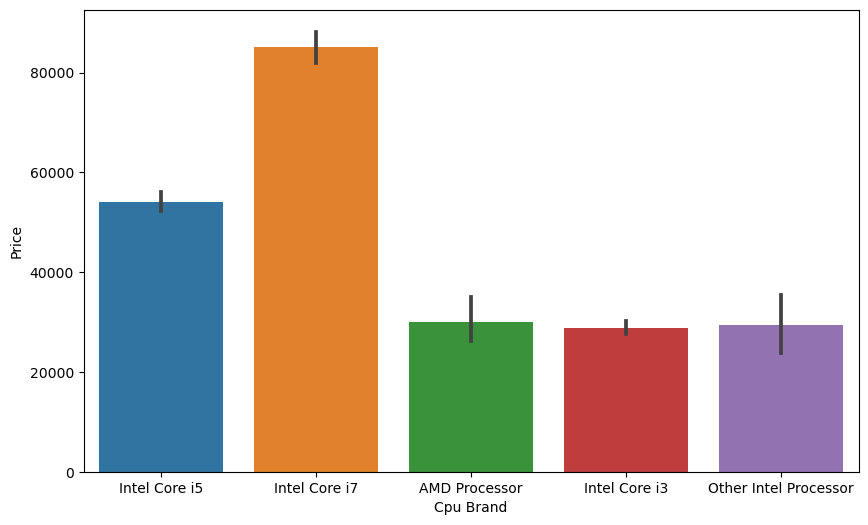

In [41]:
sns.barplot(x=data['Cpu Brand'],y=data['Price'])

In [42]:
data.drop(columns=['Cpu','Cpu name'],axis=1,inplace=True)

In [43]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

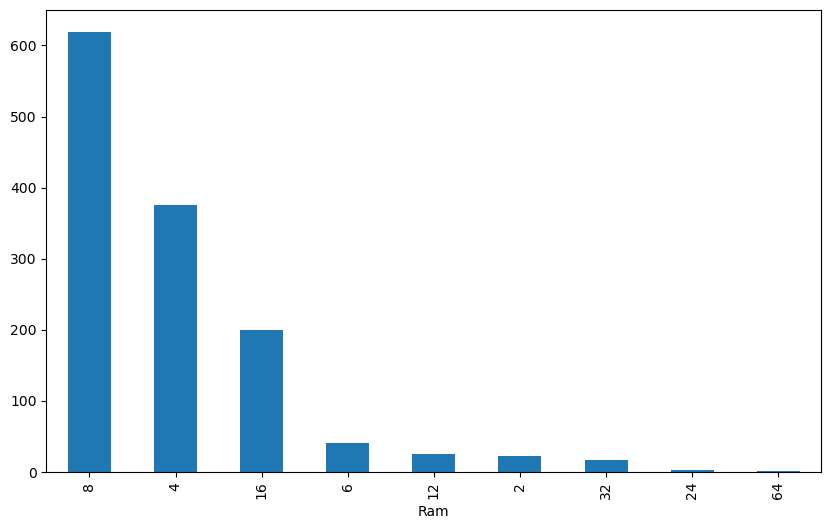

In [44]:
data['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

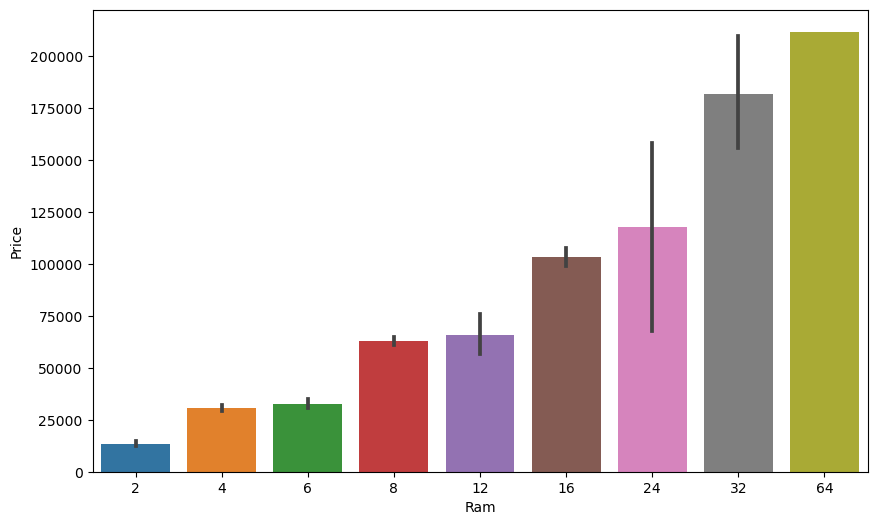

In [45]:
sns.barplot(x=data['Ram'],y=data['Price'])

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float64
 7   Price        1303 non-null   float64
 8   Touchscreen  1303 non-null   int64  
 9   Ips          1303 non-null   int64  
 10  ppi          1303 non-null   float64
 11  Cpu Brand    1303 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 117.2+ KB


In [47]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [48]:
cols=['Company','TypeName','Memory','Gpu','OpSys','Cpu Brand']

In [49]:
data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [50]:
mapped=data.groupby('Company')['Price'].median()

In [51]:
data['Company']=data['Company'].map(mapped)

In [52]:
data['TypeName']= data['TypeName'].map({'Notebook':0,'Gaming':1,'Ultrabook':2,'2 in 1 Convertible':3,
                                       'Workstation':4,'Netbook':0})

In [53]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand
0,71378.6832,2,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,71378.6832,2,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,51495.1200,0,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,71378.6832,2,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,71378.6832,2,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [54]:
data['OpSys']=data['OpSys'].apply(lambda x: 1 if 'Windows 10' in x else 0)

In [55]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand
0,71378.6832,2,8,128GB SSD,Intel Iris Plus Graphics 640,0,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,71378.6832,2,8,128GB Flash Storage,Intel HD Graphics 6000,0,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,51495.1200,0,8,256GB SSD,Intel HD Graphics 620,0,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,71378.6832,2,16,512GB SSD,AMD Radeon Pro 455,0,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,71378.6832,2,8,256GB SSD,Intel Iris Plus Graphics 650,0,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [56]:
data['Cpu Brand']=data['Cpu Brand'].map({'Intel Core i7':0,'Intel Core i5':1,'Other Intel Processor':2,
                                        'Intel Core i3':3,'AMD Processor':4})

In [57]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand
0,71378.6832,2,8,128GB SSD,Intel Iris Plus Graphics 640,0,1.37,71378.6832,0,1,226.983005,1
1,71378.6832,2,8,128GB Flash Storage,Intel HD Graphics 6000,0,1.34,47895.5232,0,0,127.677940,1
2,51495.1200,0,8,256GB SSD,Intel HD Graphics 620,0,1.86,30636.0000,0,0,141.211998,1
3,71378.6832,2,16,512GB SSD,AMD Radeon Pro 455,0,1.83,135195.3360,0,1,220.534624,0
4,71378.6832,2,8,256GB SSD,Intel Iris Plus Graphics 650,0,1.37,96095.8080,0,1,226.983005,1


In [58]:
data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder
oe=LabelEncoder()
data['Gpu']=oe.fit_transform(data['Gpu'])
data['Memory']=oe.fit_transform(data['Memory'])

In [60]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand
0,71378.6832,2,8,4,58,0,1.37,71378.6832,0,1,226.983005,1
1,71378.6832,2,8,2,51,0,1.34,47895.5232,0,0,127.677940,1
2,51495.1200,0,8,16,53,0,1.86,30636.0000,0,0,141.211998,1
3,71378.6832,2,16,29,9,0,1.83,135195.3360,0,1,220.534624,0
4,71378.6832,2,8,16,59,0,1.37,96095.8080,0,1,226.983005,1


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   float64
 1   TypeName     1303 non-null   int64  
 2   Ram          1303 non-null   int32  
 3   Memory       1303 non-null   int32  
 4   Gpu          1303 non-null   int32  
 5   OpSys        1303 non-null   int64  
 6   Weight       1303 non-null   float64
 7   Price        1303 non-null   float64
 8   Touchscreen  1303 non-null   int64  
 9   Ips          1303 non-null   int64  
 10  ppi          1303 non-null   float64
 11  Cpu Brand    1303 non-null   int64  
dtypes: float64(4), int32(3), int64(5)
memory usage: 107.0 KB


<Axes: >

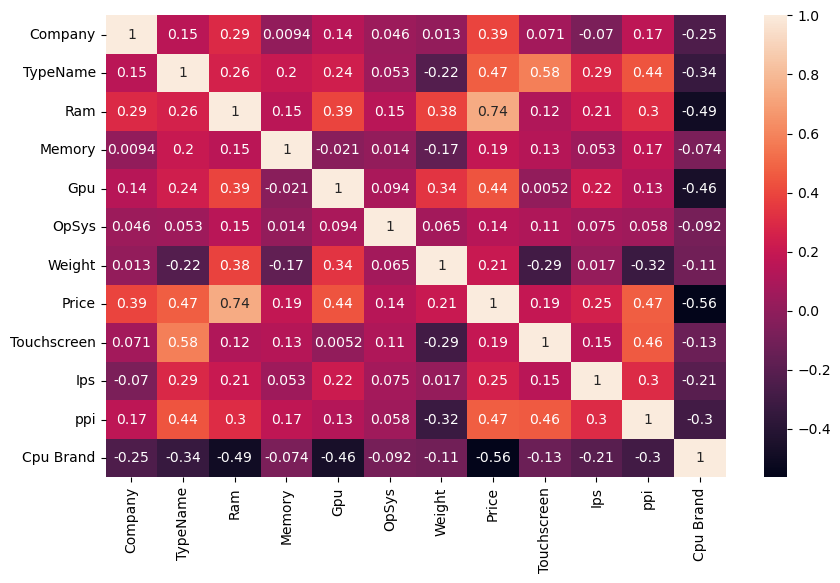

In [62]:
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='Price', ylabel='Density'>

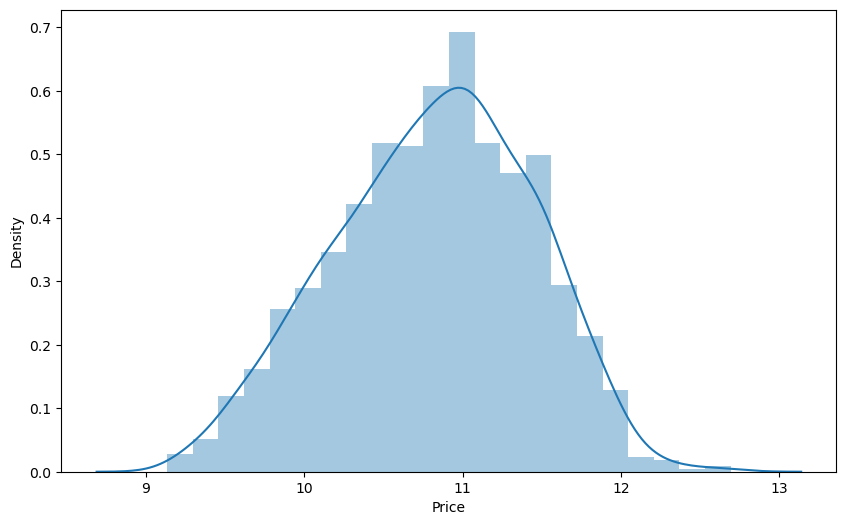

In [63]:
sns.distplot(np.log(data['Price']))

In [64]:
X=data.drop('Price',axis=1)
y=data['Price']

In [65]:
X

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Touchscreen,Ips,ppi,Cpu Brand
0,71378.6832,2,8,4,58,0,1.37,0,1,226.983005,1
1,71378.6832,2,8,2,51,0,1.34,0,0,127.677940,1
2,51495.1200,0,8,16,53,0,1.86,0,0,141.211998,1
3,71378.6832,2,16,29,9,0,1.83,0,1,220.534624,0
4,71378.6832,2,8,16,59,0,1.37,0,1,226.983005,1
...,...,...,...,...,...,...,...,...,...,...,...
1298,47898.7200,3,4,4,47,1,1.80,1,1,157.350512,0
1299,47898.7200,3,16,29,47,1,1.30,1,1,276.053530,0
1300,47898.7200,0,2,35,40,1,1.50,0,0,111.935204,2
1301,51495.1200,0,6,10,21,1,2.19,0,0,100.454670,0


In [66]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.15,random_state=2)

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [68]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand
0,71378.6832,2,8,4,58,0,1.37,71378.6832,0,1,226.983005,1
1,71378.6832,2,8,2,51,0,1.34,47895.5232,0,0,127.677940,1
2,51495.1200,0,8,16,53,0,1.86,30636.0000,0,0,141.211998,1
3,71378.6832,2,16,29,9,0,1.83,135195.3360,0,1,220.534624,0
4,71378.6832,2,8,16,59,0,1.37,96095.8080,0,1,226.983005,1


In [69]:
from sklearn.metrics import r2_score
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)

In [70]:
y_pred=model.predict(xtest)

In [71]:
from sklearn.metrics import r2_score, mean_absolute_error

print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.6965059143243374
MAE 13584.695329322441


In [72]:
from sklearn.preprocessing import StandardScaler,RobustScaler
sc=StandardScaler()
rs=RobustScaler()

In [73]:
xtrain=pd.DataFrame(rs.fit_transform(xtrain))
xtest=pd.DataFrame(rs.transform(xtest))

# Linear Regression

In [74]:
model=lr.fit(xtrain,ytrain)
model

LinearRegression()

In [75]:
y_pred=model.predict(xtest)

In [78]:
print('R2 Score',r2_score(ytest,y_pred))
print('Mean Square Error',mean_absolute_error(ytest,y_pred))

R2 Score 0.6965059143243375
Mean Square Error 13584.695329322441


# Ridge Regression

In [79]:
rg=Ridge()
model=rg.fit(xtrain,ytrain)

In [80]:
y_pred=model.predict(xtest)

In [81]:
r2_score(ytest,y_pred)

0.6963460049611314

# Lasso

In [83]:
ls=Lasso()
model=ls.fit(xtrain,ytrain)
y_pred=model.predict(xtest)


In [87]:
print('R2 Score :',r2_score(ytest,y_pred))
print('MEA :',mean_absolute_error(ytest,y_pred))

R2 Score : 0.6965044011324732
MEA : 13585.169993732852


In [96]:
knn=KNeighborsRegressor()
model=knn.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
print('R2 Score :',r2_score(ytest,y_pred))
print('MEA :',mean_absolute_error(ytest,y_pred))

R2 Score : 0.7887539884453011
MEA : 10642.073260408162


# Descision Tree

In [97]:
dt=DecisionTreeRegressor(max_depth=8)
model=dt.fit(xtrain,ytrain)
y_pred=dt.predict(xtest)
print('R2 Score :',r2_score(ytest,y_pred))
print('MEA :',mean_absolute_error(ytest,y_pred))

R2 Score : 0.7685175989511724
MEA : 11221.260125637149


# SVM

In [99]:
svm=SVR(kernel='rbf',C=10000,epsilon=0.1)
model=svm.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
print('R2 Score :',r2_score(ytest,y_pred))
print('MEA :',mean_absolute_error(ytest,y_pred))

R2 Score : 0.7200312822357677
MEA : 13050.110806772043


# Random Forest

In [102]:
rf=RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
model=rf.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
print('R2 Score :',r2_score(ytest,y_pred))
print('MEA :',mean_absolute_error(ytest,y_pred))

R2 Score : 0.8479331408757228
MEA : 8725.264215268511


# ExtraTreesRegressor

In [106]:
etr = ExtraTreesRegressor(n_estimators=100,
                         random_state=3,
                         max_samples=None,  # Set to None to use the default value
                         max_features=0.75,
                         max_depth=15)

model=etr.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
print('R2 Score :',r2_score(ytest,y_pred))
print('MEA :',mean_absolute_error(ytest,y_pred))

R2 Score : 0.8432664639640968
MEA : 8793.46105842001


# AdaBoostRegressor

In [107]:
ada=AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
model=ada.fit(xtrain,ytrain)
model=model.predict(xtest)
print('R2 Score :',r2_score(ytest,y_pred))
print('MEA :',mean_absolute_error(ytest,y_pred))

R2 Score : 0.8432664639640968
MEA : 8793.46105842001


# Gradient descent

In [108]:
gd=GradientBoostingRegressor(n_estimators=500)
model=gd.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
print('R2 Score :',r2_score(ytest,y_pred))
print('MEA :',mean_absolute_error(ytest,y_pred))

R2 Score : 0.8627307131061568
MEA : 8492.97071748562


# XGBoost

In [109]:
xg=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
model=xg.fit(xtrain,ytrain)
y_pred=xg.predict(xtest)
print('R2 Score :',r2_score(ytest,y_pred))
print('MEA :',mean_absolute_error(ytest,y_pred))

R2 Score : 0.8648504044585149
MEA : 8437.379479540017


# Votting Regressor

In [113]:
from sklearn.ensemble import VotingRegressor
rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=None,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.7)
vt=VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])
model=vt.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
print('R2 Score :',r2_score(ytest,y_pred))
print('MEA :',mean_absolute_error(ytest,y_pred))

R2 Score : 0.8572579147506624
MEA : 8475.287407499305
